In [5]:
import json

In [8]:
cd data\ collection

/Users/evansadler/Desktop/Project Files/data collection


In [9]:
with open('Seattle.json', 'r') as f:
    js = json.load(f)

In [10]:
dic = {}

for geo in js['features']:
    fp = geo['geometry']['coordinates'][0][0]
    lat_max, lat_min = fp[1], fp[1]
    lng_max, lng_min = fp[0], fp[0]
    for point in geo['geometry']['coordinates'][0]:
        if point[1] > lat_max:
            lat_max = point[1]
        elif point[1] < lat_min:
            lat_min = point[1]
        if point[0] > lng_max:
            lng_max = point[0]
        elif point[0] < lng_min:
            lng_min = point[0]
    dic[geo['properties']['REGIONID']] = [lat_min, lng_min, lat_max, lng_max]



In [33]:
with open('yelp_json.json', 'w') as outfile:
    json.dump(dic, outfile)

In [5]:
cd data\ collection

/Users/evansadler/Desktop/Project Files/data collection


In [6]:
from yelp_class_keyword import Yelp

In [17]:
y = Yelp('Seattle','WA',dic)

In [18]:
y.yelp_data(40, 'nightlife')

KeyError: 'businesses'

In [11]:
dic[271892] = [dic[271892][0][1], dic[271892][1][0], dic[271892][1][1], dic[271892][0][0]]

In [12]:
import pandas as pd 
import numpy as np
from pymongo import MongoClient

city = 'Seattle'
state = 'WA'
client = MongoClient('localhost', 27017)
db = client['neighborhood_recommender']
yelp_collection = db['yelp_data_new' + '_' + city + '_' + state]
cursor = yelp_collection.find()
data = [hood for hood in cursor]
df = pd.DataFrame(data)

In [13]:
group = df.groupby(['hood_id','category'])['id'].count()

In [14]:
df_g = pd.DataFrame(group).reset_index()

In [15]:
df_g = df_g.pivot(index = 'hood_id', values = 'id', columns = 'category')

In [16]:
df_g.fillna(0, inplace = True)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(df_g, figsize=(12, 12))

In [19]:
df_g.drop(['auto', 'homeservices'], axis = 1, inplace = True)

In [20]:
from sklearn.decomposition import PCA, SparsePCA,TruncatedSVD
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score

In [23]:
cd Dimension\ Reduction

/Users/evansadler/Desktop/Project Files/Dimension Reduction


In [24]:
from pca_class import ReduceFeatures

In [290]:
rf = ReduceFeatures(df_g, df_g.index)
rf.preprocessing(0)
rf.crimes = pd.Index(rf.crimes)
rf.hcluster_cols(0.10)
rf.preprocessing(0)

df_c = rf.sparse_pca(n_components = 3)
rf.best_cluster()

For n_clusters = 3 The average silhouette_score is : 0.651859432968
For n_clusters = 4 The average silhouette_score is : 0.578800884256
For n_clusters = 5 The average silhouette_score is : 0.57216346834
For n_clusters = 6 The average silhouette_score is : 0.51314959455
For n_clusters = 7 The average silhouette_score is : 0.508632503496
For n_clusters = 8 The average silhouette_score is : 0.465981440497
For n_clusters = 9 The average silhouette_score is : 0.385567936917
For n_clusters = 10 The average silhouette_score is : 0.389198788216


In [291]:
df_c

,1,2,3
restaurants,-5.229814,-2.828842,0.000000
shopping,-7.685625,0.000000,0.000000
[u'arts' u'nightlife'],0.000000,-7.790434,0.000000
active,0.000000,0.000000,7.831761


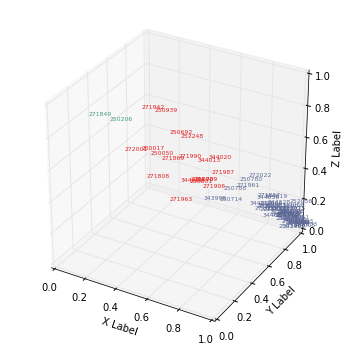

In [292]:
rf.plot_embedding()

category,active,arts,nightlife,restaurants,shopping
hood_id,,,,,
250017,79,41,59,149,199
250050,75,47,32,179,170
250146,18,9,2,26,72
250149,29,13,4,5,86
250206,128,74,137,200,200
250383,25,10,6,10,84
250692,98,50,39,98,187
250714,38,31,20,74,129
250780,57,14,14,42,121


In [296]:
df_g.reset_index().to_csv('yelp_pca_data.csv', index = False)